In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
from data.dataset import ModelNet40, collate_fn
import os
import numpy as np

from utils import *
from model import *

### Getting the dataset path

In [152]:
os.chdir('..')
modelnet40_path = os.path.join(os.getcwd(), 'ModelNet40')
os.chdir('TransformersFor3dPointCLouds')
print(modelnet40_path)

/scratch/users/ahamadeh18/COMP390/ModelNet40


### Initalizing the training set DataLoader object

In [153]:
SAMPLE_SIZE = 128
TEST = False
SAMPLING_METHOD = 'fps'

In [154]:
train_loader_256 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

### Creating the model

In [155]:
in_features = 3
feature_dim = 128
out_features = 1024
k_size = 128
NUM_CLASSES = 40

In [156]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

## Training specifications:

### Optimizer:

In [157]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-3
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [158]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

## Overfitting the model

In [159]:
from train import train
epochs = 15
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=[train_loader_256[0]],
          criterion=criterion, epochs=epochs, verbose=False)

epoch: 0 | loss: -0.012394272722303867
Epoch time: 0.07100176811218262
epoch: 1 | loss: -0.0052964226342737675
Epoch time: 0.024972915649414062
epoch: 2 | loss: -0.011859443038702011
Epoch time: 0.07094335556030273
epoch: 3 | loss: -0.01807466521859169
Epoch time: 0.07000923156738281
epoch: 4 | loss: -0.01932906173169613
Epoch time: 0.0106048583984375
epoch: 5 | loss: -0.02544025518000126
Epoch time: 0.013296127319335938
epoch: 6 | loss: -0.013697688467800617
Epoch time: 0.013726472854614258
epoch: 7 | loss: -0.025794874876737595
Epoch time: 0.014264106750488281
epoch: 8 | loss: -0.11973271518945694
Epoch time: 0.010962724685668945
epoch: 9 | loss: -0.16071085631847382
Epoch time: 0.031107187271118164
epoch: 10 | loss: -0.5710536241531372
Epoch time: 0.030925750732421875
epoch: 11 | loss: -0.8992629647254944
Epoch time: 0.028964757919311523
epoch: 12 | loss: -0.9980373978614807
Epoch time: 0.011022567749023438
epoch: 13 | loss: -0.998969316482544
Epoch time: 0.023000240325927734
epoch:

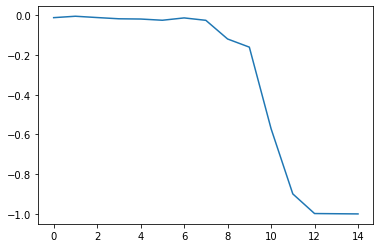

In [160]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [161]:
x_test = model(train_loader_256[0][0].float())
(torch.argmax(x_test) == train_loader_256[0][1]).item()

True

In [162]:
x_test

tensor([9.9999e-01, 3.1709e-07, 6.9103e-08, 2.4755e-07, 1.9495e-07, 3.3124e-07,
        6.3252e-07, 2.0900e-07, 8.6652e-07, 1.0556e-07, 1.7264e-07, 8.4080e-08,
        2.8219e-07, 1.9040e-07, 3.0959e-07, 3.0908e-07, 5.2649e-07, 3.0828e-07,
        2.2183e-07, 3.9650e-07, 3.5337e-07, 6.2676e-07, 1.7227e-07, 5.6204e-07,
        2.3479e-07, 2.7386e-07, 3.9709e-07, 1.0169e-07, 3.7732e-07, 3.5456e-07,
        1.8535e-07, 5.2169e-07, 1.4469e-07, 1.9993e-07, 1.8800e-07, 2.0225e-07,
        8.9016e-07, 3.9748e-07, 1.2552e-07, 2.7053e-07],
       grad_fn=<SoftmaxBackward0>)

## Training the model

In [171]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

### DataLoader

In [172]:
SAMPLE_SIZE = 128
TEST = False
SAMPLING_METHOD = 'fps'

model_net_256 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

In [173]:
batch_size = 32

In [174]:
from torch.utils.data import DataLoader

train_loader = DataLoader(model_net_256, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

### Optimizer:

In [181]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [182]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

In [ ]:
epochs = 5
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=train_loader_256,
          criterion=criterion, epochs=epochs, save_params=True, verbose=False, load_model=True)

epoch: 0 | loss: -127.69613912854719
Epoch time: 2034.1069910526276


## Model Evaluation:

### Loading the test set:

In [118]:
SAMPLE_SIZE = 128
TEST = True
SAMPLING_METHOD = 'fps'
batch_size = 1

model_net_256_test = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)
test_laoder = DataLoader(model_net_256_test, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

In [119]:
from eval import evaluate

In [120]:
evaluate(model, model_net_256_test, epochs, verbose=True)

Accuracy: 0.77%	 |	Epoch: 1
Accuracy: 0.77%	 |	Epoch: 2
Accuracy: 0.77%	 |	Epoch: 3
Accuracy: 0.77%	 |	Epoch: 4


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/users/ahamadeh18/COMP390/TransformersFor3dPointCLouds/parameters/param_epoch_5'

In [121]:
data, label, _ = model_net_256_test[0]

In [122]:
yhat = model(data.float())
print(label)
print((torch.argmax(yhat) == label).item())

tensor(0)
True


In [123]:
accuracy = 0
N = len(model_net_256_test)
model.eval()
for point in model_net_256_test:
    if point == None:
        N -= 1
        continue
    x, y, _ = point
    yhat = model(x.float())
    
    if (torch.argmax(yhat) == y).item():
        accuracy += 1

In [124]:
acc = accuracy / N

In [125]:
acc

0.0078060805258833195